In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from IPython.display import Image

# Linear Regression and Overfitting / Underfitting

Source: 

- Maha K, **Overfitting and Underfitting: Simple Explanations and Python Examples,** https://medium.com/@maheshhkanagavell/overfitting-and-underfitting-simple-explanations-and-python-examples-74424b1076c3
- Ivan Zakharchuk, **Generalization, Overfitting, and Under-fitting in Supervised Learning,** https://ivanzakharchuk.medium.com/generalization-overfitting-and-underfitting-in-supervised-learning-a21f02ebf3df
- Sujatha Mudadla, **How can overfitting be effectively addressed in machine learning and deep learning models, and what are the key strategies, techniques, and considerations involved in mitigating the impact of overfitting for improved model generalization?**, https://medium.com/@sujathamudadla1213/how-can-overfitting-be-effectively-addressed-in-machine-learning-and-deep-learning-models-and-what-bfc3c805d123
- AS, **Overcoming overfitting a model in Machine Learning,** https://medium.com/@jwbtmf/overcoming-overfitting-a-model-in-machine-learning-7dd6324d15bf
- Ronak vala, **What are L1 and L2 Regularization in Machine Learning and How to Apply Them in Python?** https://github.com/RNVALA/machine_learning/blob/main/L1%20and%20L2%20Regularization/L1%20and%20L2%20Regularization.ipynb


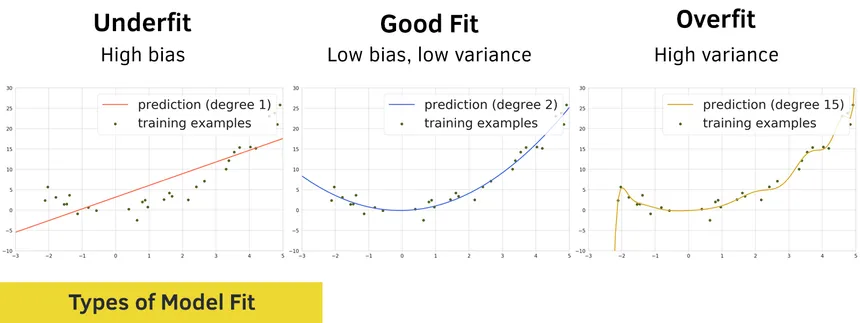

In [3]:
Image(filename="figures/regularization_5.png", width=900)

In general, ML makes following assumptions about the data :

- Future test data set has the same properties as current train set.
  
- If model accurate on training set and test set similar to training set, we can also expect model to be accurate on a test set.


In reality, however, either in most cases either **Overfitting** or **Underfitting** will initially occur:

- **Underfitting** occurs when the model is too simple and cannot capture the underlying patterns in the data, even with sufficient training data. 

- This leads to poor performance on both the training and testing datasets.

- **Overfitting** occurs when the model is too complex and starts to fit to noise or random fluctuations in the training data. 

- Overfitting happens when we try to fit a complex model with an inadequate amount of training data.

- An overfitted model will capture complex patterns in the training set but it often misses seeing global patterns in the training set that would help it generalize well on the unseen test set. 

- This can result in very high accuracy on the training data but poor performance on the testing data, indicating that the model has failed to generalize well to new, unseen data.

#### Example:

**Overfitting:** 
- If the training set MSE is much lower than the test set MSE, it indicates that the model has overfit the training data, i.e., it has learned the noise in the training data instead of the underlying pattern. 
- This leads to high variance and low bias.

**Underfitting**: 
- On the other hand, if the training set MSE and test set MSE are both high, it indicates that the model has underfit the data. 
- The model is too simple to capture the underlying pattern. 
- This leads to high bias and low variance.

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate some random data
np.random.seed(42)
X = np.random.rand(100, 1)
y = 2 + 3 * X + np.random.randn(100, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training set and calculate the mean squared error
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)

# Predict on the test set and calculate the mean squared error
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Training set MSE: {mse_train:.2f}")
print(f"Test set MSE: {mse_test:.2f}")

Training set MSE: 0.85
Test set MSE: 0.65


#### Strategies to handle overfitting:

1. **Cross-Validation:**
- Use techniques like **k-fold cross-validation** to evaluate your model on multiple subsets of the data.

- This provides a more robust estimate of the model’s performance and helps identify overfitting.

3. **Train-Validation-Test Split:**
- Split your dataset into three parts: a training set, a validation set, and a test set.

    * Train your model on the training set.
    
    * Tune hyperparameters using the validation set.
    
    * Evaluate the final model on the test set.

4. **Feature Selection:**
- Choose relevant features and eliminate irrelevant or redundant ones.

- Feature selection helps reduce the complexity of the model, making it less prone to overfitting.

5. **Regularization:**
- Introduce regularization terms in the model’s cost function.

- Common regularization techniques include **L1 regularization (Lasso)** and **L2 regularization (Ridge)**. 

- These penalize large coefficients and help prevent overfitting.

6. **Dropout (for Deep Learning):**
- In deep learning, especially for **neural networks**, **dropout** is a regularization technique where randomly selected neurons are ignored during training.

- This helps prevent co-adaptation of neurons and improves generalization.

7. **Data Augmentation:**
- Increase the size of your training dataset by applying various transformations (rotation, flipping, zooming, etc.) to the existing data.

- This introduces diversity and helps the model to generalize better.

8. **Early Stopping:**
- Monitor the model’s performance on a validation set during training.

- If the performance stops improving or degrades, stop training to prevent overfitting.

9. **Ensemble Methods:**
- Combine multiple models (e.g., **bagging, boosting**) to create a more robust and accurate model.
  
- Ensemble methods can mitigate the impact of overfitting in individual models.

9. **Reduce Model Complexity:**
- Simplify the model architecture by reducing the number of layers, nodes, or parameters.

- A less complex model is less likely to overfit.

11. **Hyperparameter Tuning:**
- Carefully choose hyperparameters, such as **learning rate, batch size,** and the **number of layers**, through systematic hyperparameter tuning.

- **Grid search** or **random search** can help in finding optimal values.

12. **Pruning (for Decision Trees):**
- Prune decision trees to remove branches that do not provide significant predictive power.

- This helps prevent the tree from fitting the noise in the training data.

13. **Use More Data**:
Increase the size of your training dataset to improve generalization (not always be feasible).

14. **Bayesian Methods:**
Bayesian methods provide a probabilistic framework for modeling uncertainty, which can help in handling overfitting by capturing the uncertainty in model parameters.

15. **Model Selection:**
- Experiment with different model architectures or algorithms.

- Some models may be inherently less prone to overfitting on a particular type of data.



#### Example: Regularization

**Penalty Terms**

Through biasing data points towards specific values such as very small values to zero, **regularization** achieves this biasing by adding a tuning parameter to strengthen those data points. 

**L1 regularization:** 
- It adds an L1 penalty that is equal to the absolute value of the magnitude of the coefficient, or simply restricting the size of coefficients.
- For example, **Lasso regression** implements this method.

**L2 Regularization:** 
- It adds an L2 penalty which is equal to the square of the magnitude of coefficients.
- For example, **Ridge regression** and **SVM** implement this method.

**Elastic Net:** 
- When L1 and L2 regularization combine together, it becomes the elastic net method, it adds a hyperparameter.

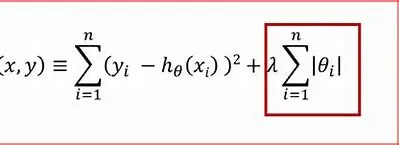

In [5]:
# L1 regularization:
Image(filename="figures/regularization_6a.png", width=600)

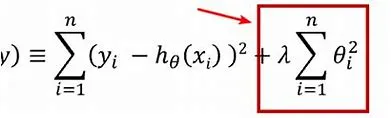

In [6]:
# L2 regularization:
Image(filename="figures/regularization_6b.png", width=600)

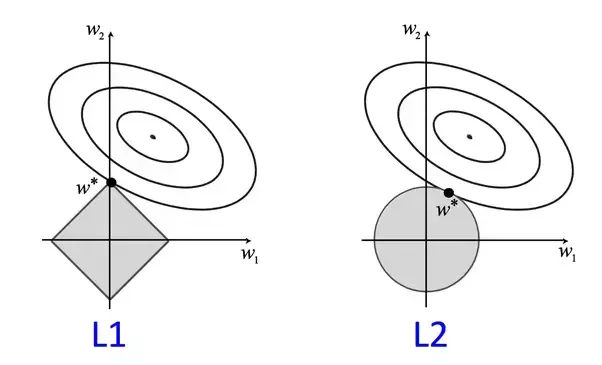

In [7]:
Image(filename="figures/regularization_6.png", width=600)

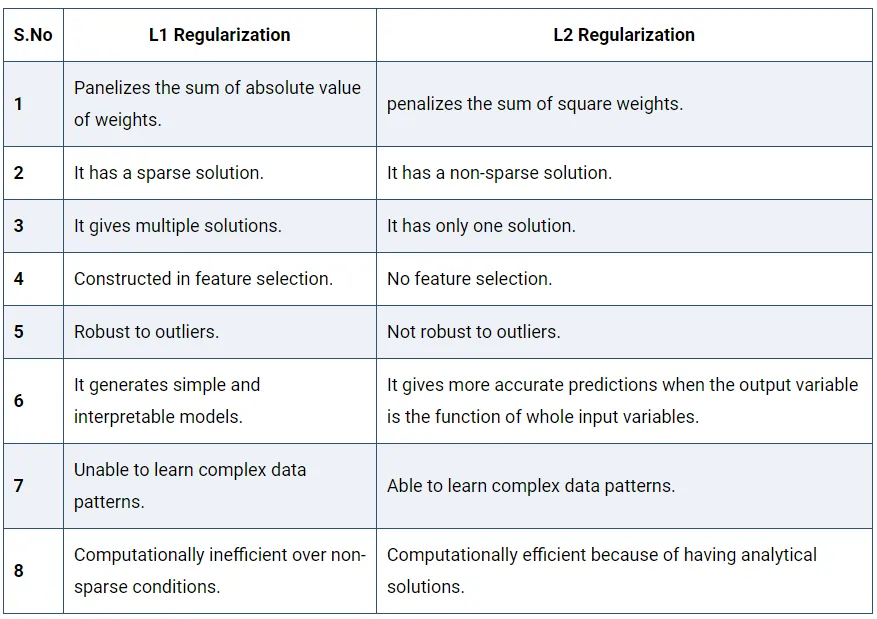

In [8]:
Image(filename="figures/regularization_7.png", width=800)

#### Example:

In [9]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Suppressing the warning for clean notebooks
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Reading data
dataset=pd.read_csv('data/Melbourne_housing_FULL.csv')
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [12]:
dataset.shape

(34857, 21)

In [13]:
dataset.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [14]:
cols_to_use=['Suburb','Rooms','Type','Method','SellerG','Regionname','Propertycount','Distance','CouncilArea','Bedroom2','Bathroom','Car','Landsize','BuildingArea','Price']
dataset=dataset[cols_to_use]
dataset.shape
dataset.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [15]:
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [16]:
cols_to_fill_zero=['Propertycount','Distance','Bedroom2','Bathroom','Car']
dataset[cols_to_fill_zero]=dataset[cols_to_fill_zero].fillna(0)
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        0
Distance             0
CouncilArea          3
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [17]:
dataset.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [18]:
dataset['Landsize']=dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea']=dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())

In [19]:
dataset.isna().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

In [20]:
dataset.dropna(inplace=True) # Dropping some colums whose values are missing
dataset.isna().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

In [21]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,False,...,False,False,False,False,False,False,False,False,True,False
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,False,...,False,False,False,False,False,False,False,False,True,False
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,False,...,False,False,False,False,False,False,False,False,True,False
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,False,...,False,False,False,False,False,False,False,False,True,False
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,False,...,False,False,False,False,False,False,False,False,True,False


In [22]:
dataset.shape

(27244, 745)

In [23]:
X=dataset.drop('Price',axis=1)
y=dataset['Price']

#### Linear regressioon without regularization

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [25]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(X_train,y_train)

In [26]:
reg.score(X_test,y_test)

0.13853683161554176

In [27]:
reg.score(X_train,y_train)

0.6827792395792723

#### Lasso regression - Linear regressioon with L1 regularization

In [28]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [29]:
lasso_reg.score(X_train,y_train)

0.6766985624766824

In [30]:
lasso_reg.score(X_test,y_test)

0.6636111369404489

#### Ridge regression - Linear regressioon with L2 regularization

In [31]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=50,max_iter=100,tol=0.1)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [32]:
ridge_reg.score(X_test,y_test)

0.6670848945194958

In [33]:
ridge_reg.score(X_train,y_train)

0.6622376739684328